#  **<span style="color:blue">DAY 5: Data Analysis, Pandas and others module</span>**  

## <span style="font-size:22px; font-weight:700; color:#007300;"> What is Pandas? </span>

**Pandas** is a Python library used to work with tables of data (rows + columns), similar to Excel.
  - It helps you:
      - Import CSV files
      - Clean and explore data
      - Compute statistics (mean, max, min)
      - Plot simple graphs

<h3 style="color:#ff6600;">🔹 Importing Pandas</h3>

In [37]:
import pandas as pd

<h3 style="color:#ff6600;">🔹 Loading Data</h3>

In [ ]:
df = pd.read_csv("file.csv")
df = pd.read_excel("file.xlsx")

In [15]:
df = pd.read_csv("rainfall_data.csv")   

<h3 style="color:#ff6600;">🔹 Viewing Data</h3>

In [80]:
df.head()       # first 5 rows

In [ ]:
df.tail()       # last 5 rows

In [ ]:
df.sample(5)    # random rows

In [ ]:
df.shape        # (rows, columns)

In [ ]:
df.info()       # data types + memory

In [88]:
df.describe()   # statistics

<h3 style="color:#ff6600;">🔹 Selecting Columns</h3>

In [45]:
df["rainfall_mm"]

In [ ]:
df[["rainfall_mm", "temperature_C"]]

In [49]:
df.filter(like="temp")

<h3 style="color:#ff6600;">🔹 Filtering Rows</h3>

In [51]:
df[df["rainfall_mm"] > 10]

In [73]:
df[(df.temperature_C > 25) & (df.humidity_% < 50)]

In [56]:
# Load the new dataset  --Agricultural_Dataset.csv

In [64]:
agri_data[agri_data["Crop"] == "Maize"]

<h3 style="color:#ff6600;">🔹 Creating New Columns</h3>

In [76]:
df["temp_F"] = df["temperature_C"] * 9/5 + 32

In [ ]:
df["is_wet"] = df["rainfall_mm"] > 10

<h3 style="color:#ff6600;">🔹 Grouping & Aggregation</h3>

In [85]:
agri_data.groupby("Region")["Rainfall_mm"].mean()

In [87]:
agri_data.groupby("Season").agg({"Temperature_C":"mean", "Rainfall_mm":"sum"})

<h3 style="color:#ff6600;">🔹 Handling Missing Data</h3>

In [ ]:
df.isna().sum()

In [ ]:
df.fillna(0)

In [ ]:
df.dropna()

<h3 style="color:#ff6600;">🔹 Saving Data</h3>

In [ ]:
df.to_csv("output.csv", index=False)

In [ ]:
df.to_excel("output.xlsx", index=False)

## 📝 **Pandas Module Exercises**

---

### **📂 A. Loading & Inspecting Data (10 exercises)**

1. Load `rainfall_data_large.csv` into a dataframe.  
2. Print the first 10 rows.  
3. Show number of rows and columns.  
4. Show column names.  
5. Show summary statistics.  
6. Display random 5 rows.  
7. Check for missing values.  
8. Print data types of each column.  
9. Select only rainfall & temperature columns.  
10. Filter rows where rainfall > 20 mm.

---

### **🌧️ B. Rainfall Dataset Exercises (10 exercises)**

11. Compute average rainfall.  
12. Compute maximum rainfall.  
13. Count wet days (≥10 mm).  
14. Plot rainfall over time.  
15. Plot temperature vs rainfall.  
16. Add a column `rainfall_category`: Heavy, Moderate, Light.  
17. Find days with humidity above 80%.  
18. Sort by rainfall descending.  
19. Find correlation between columns.  
20. Plot heatmap of correlations.

---

### 🐄 C. Animal Weight Dataset Exercises (10 exercises)**

21. Load animal_weight_large.csv.  
22. Compute mean weight.  
23. Compute total feed consumed.  
24. Plot daily weight.  
25. Plot feed intake vs weight (scatter).  
26. Add column `weight_gain` (difference).  
27. Find day with highest heart rate.  
28. Filter data for temperature > 28°C.  
29. Compute average health score.  
30. Plot histogram of heart rate.

---

### 💰**D. Market Dataset Exercises (10 exercises)**

31. Load market_prices_large.csv.  
32. Compute average price.  
33. Plot daily price trend.  
34. Add column `price_change`.  
35. Find highest inflation day.  
36. Filter rows where supply > 15 tons.  
37. Plot supply vs price (scatter).  
38. Compute correlation.  
39. Plot line chart of inflation rate.  
40. Sort by exchange rate.

---

### 🌿 **E. NDVI Dataset Exercises (10 exercises)**

41. Load ndvi_values_large.csv.  
42. Plot NDVI vs day.  
43. Compute mean NDVI.  
44. Plot LST vs NDVI.  
45. Filter NDVI values > 0.6.  
46. Add column `ndvi_class`: Low, Medium, High.  
47. Plot soil moisture distribution.  
48. Compute correlation matrix.  
49. Plot rainfall vs NDVI scatter.  
50. Find days where vegetation cover > 80%.

---

## Matplotlib visualization

### Install and import required modules

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
# Load the dataset
data = pd.read_csv("Agricultural_Dataset.csv")

#### Basic plots


**Histogram — distribution of yields**

In [105]:
plt.figure(figsize=(8,5))
plt.hist(data["Yield_kg_ha"], bins=30, color='green', edgecolor='black')
plt.title("Distribution of Crop Yields")
plt.xlabel("Yield (kg/ha)")
plt.ylabel("Frequency")
plt.show()

**Boxplot — yields per crop**

In [120]:
plt.figure(figsize=(10, 5))
data.boxplot(column="Yield_kg_ha", by="Crop", grid=False)
plt.title("Yield by Crop")
plt.suptitle("")   # removes the default pandas title
plt.xlabel("Crop")
plt.ylabel("Yield (kg/ha)")
plt.show()

**Scatter plot — rainfall vs yield**

In [122]:
plt.figure(figsize=(8,5))
plt.scatter(data["Rainfall_mm"], data["Yield_kg_ha"], alpha=0.5, color='orange')
plt.title("Rainfall vs Crop Yield")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (kg/ha)")
plt.show()

**Line plot — average yield over years**

In [126]:
# Extract year from Date
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year

avg_yield_per_year = data.groupby('Year')['Yield_kg_ha'].mean()

plt.figure(figsize=(8,5))
plt.plot(avg_yield_per_year.index, avg_yield_per_year.values, marker='o', color='green')
plt.title("Average Crop Yield Over Years")
plt.xlabel("Year")
plt.ylabel("Average Yield (kg/ha)")
plt.grid(True)
plt.show()


**Bar plot — average yield by region**

In [129]:
avg_yield_region = data.groupby('Region')['Yield_kg_ha'].mean().sort_values()

plt.figure(figsize=(10,5))
avg_yield_region.plot(kind='bar', color='skyblue')
plt.title("Average Crop Yield by Region")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Region")
plt.show()

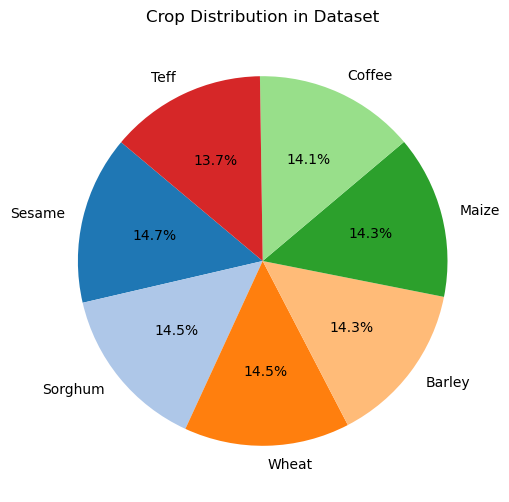

In [149]:
crop_counts = data['Crop'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140,  colors=plt.cm.tab20.colors)
plt.title("Crop Distribution in Dataset")
plt.show()


**Pie chart — crop distribution**

In [ ]:
crop_counts = data['Crop'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Crop Distribution in Dataset")
plt.show()


**Correlation heatmap (basic beginner-friendly using Matplotlib)**

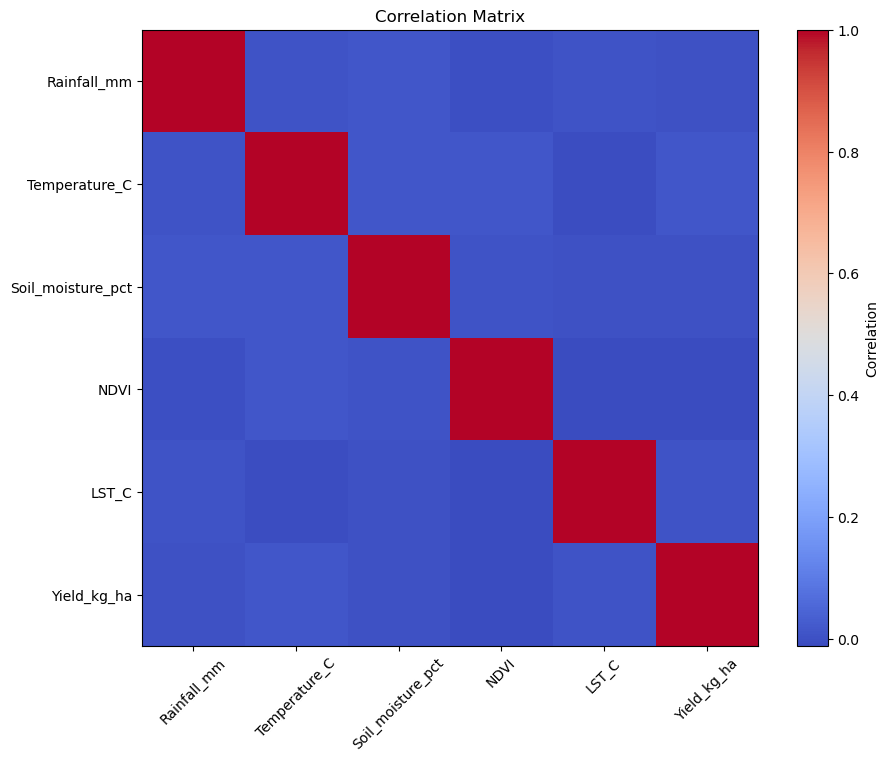

In [158]:
plt.figure(figsize=(10,8))
corr = data[["Rainfall_mm","Temperature_C","Soil_moisture_pct","NDVI","LST_C","Yield_kg_ha"]].corr()

plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()


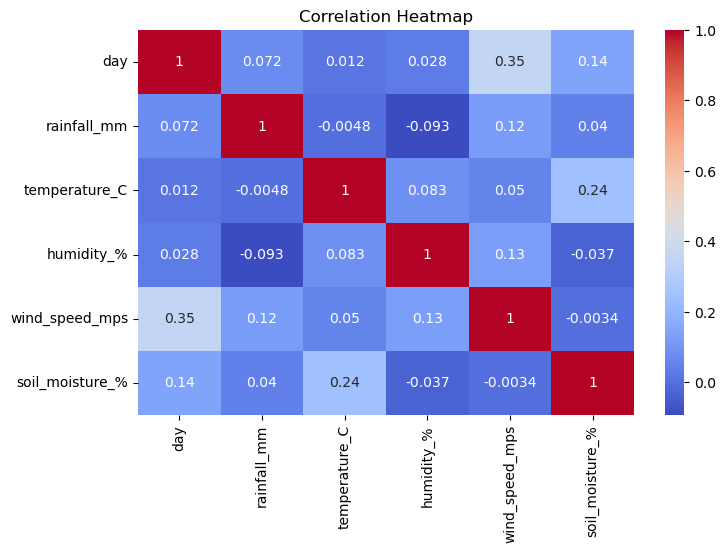

In [31]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [33]:
import numpy as np

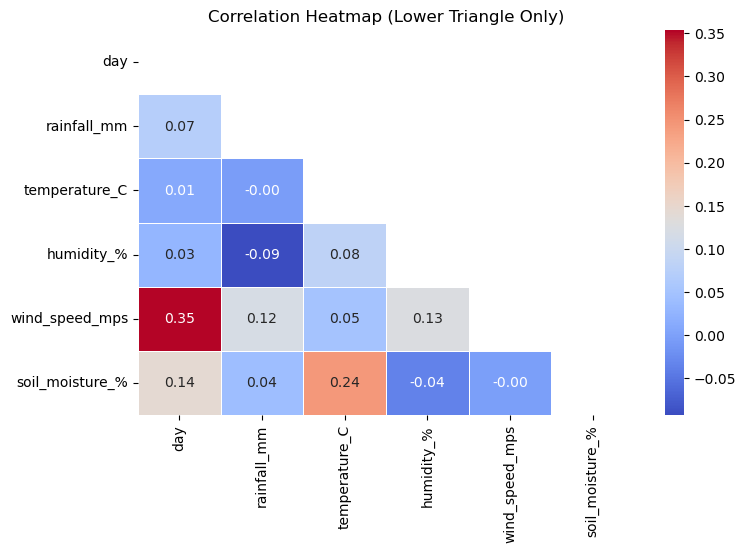

In [34]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
# np.ones_like creates a matrix of 1s with the same shape as corr
# np.triu turns the matrix into an upper triangle, with 1s above the diagonal and 0s below
# Setting dtype=bool converts 1s to True and 0s to False
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Draw the heatmap with the mask
# 'mask=mask' hides the cells where the mask is True (upper triangle)
# 'annot=True' displays the correlation values in the remaining cells (lower triangle and diagonal)
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Add title and display the plot
plt.title("Correlation Heatmap (Lower Triangle Only)")
plt.show()